___EXPLORATORY DATA ANALISYS___ 

**Let's starting by doing imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the dataset into pandas df**

Reading firt the TRAINING dataset from titanic


In [2]:
train = pd.read_csv('titanic_train.csv')

**Here you can see the 'survived' as 0 to did not survive, and 1 to the ones who survived**

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lets starting exploring our data

In our data, we can see how much of NaN (null camps) we have, for that we can do the analisys by using a heatmap of train.isnull

The marks presenting here are the NaN our dataset contains, we see a lot of NAN in the Cabin Column

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<AxesSubplot:>

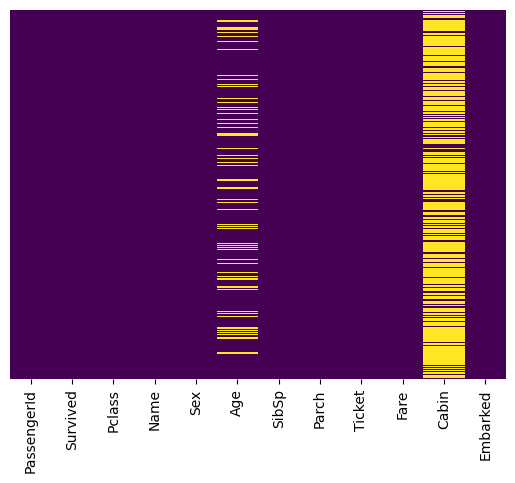

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Analisys of the survived column

In [5]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

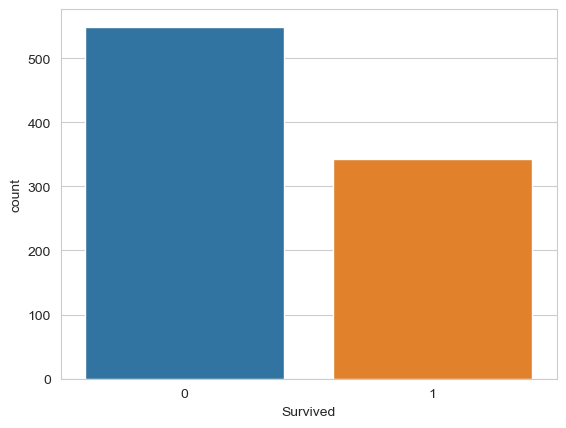

In [6]:
sns.countplot(x='Survived', data=train)

Now, survival column again by sex (hue)

<AxesSubplot:xlabel='Survived', ylabel='count'>

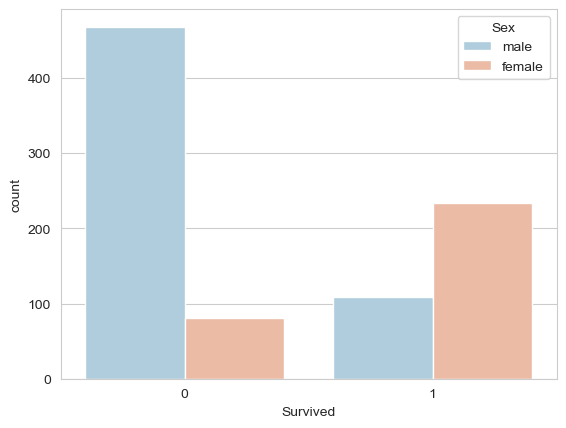

In [7]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

Exploring survival by class of ticket (hue = Pclass) (Passenger Class)

<AxesSubplot:xlabel='Survived', ylabel='count'>

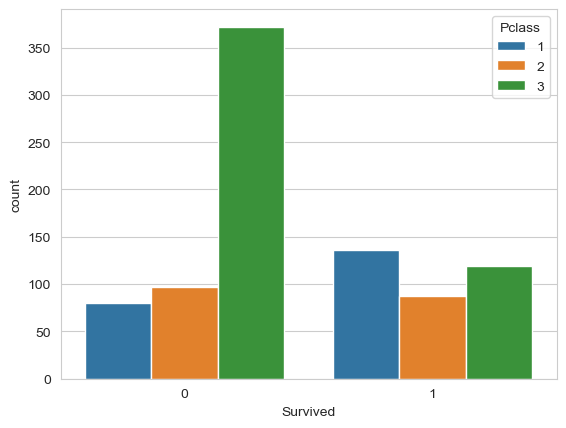

In [8]:
sns.countplot(x='Survived', data=train, hue='Pclass')

Lets take a look at the age of the people who were on the titanic

The dropna(), to drop the null values 

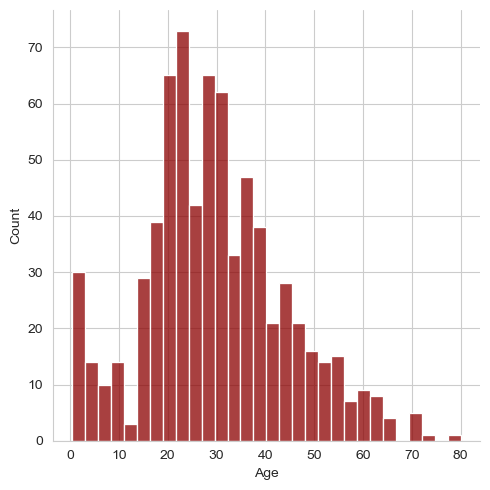

In [9]:
sns.displot(train['Age'].dropna(), kde=False, bins=30, color='darkred')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


INFO just to info and get an idea of what to explore next, we'll be exploring the SibSp column (sibbling/spouse onboard)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

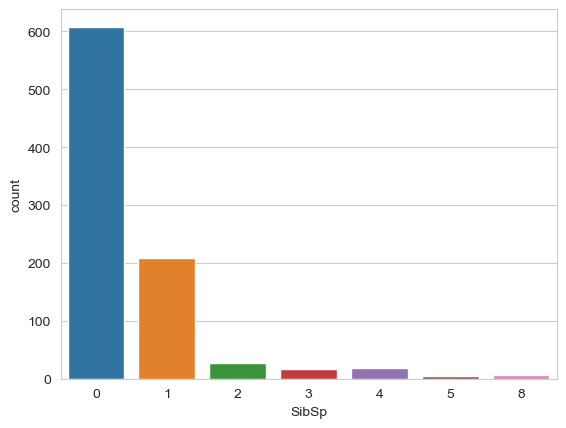

In [11]:
sns.countplot(x='SibSp', data=train)

Fare columns, how much people pay as a distribution

<AxesSubplot:>

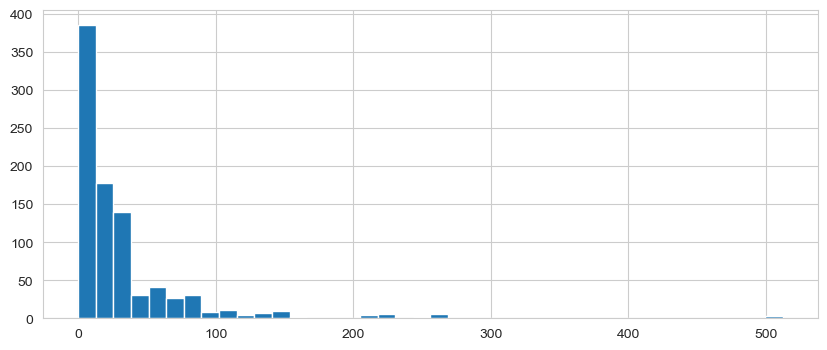

In [12]:
train['Fare'].hist(bins=40, figsize=(10,4))

**NOW AN EXAMPLE OF EXPLORING THIS DATA WITH CUFFLINKS***

In [26]:
import cufflinks as cf

In [27]:
cf.go_offline()

In [28]:
train['Fare'].iplot(kind='hist', bins=30)

***------------ CLEANING DATA --------- PT 2***

We will fill in the nan age values

With this we can see the mean age  -> 36

In [55]:
import plotly.express as px

In [58]:
fig = px.box(train, x="Pclass", y="Age")
fig.show()

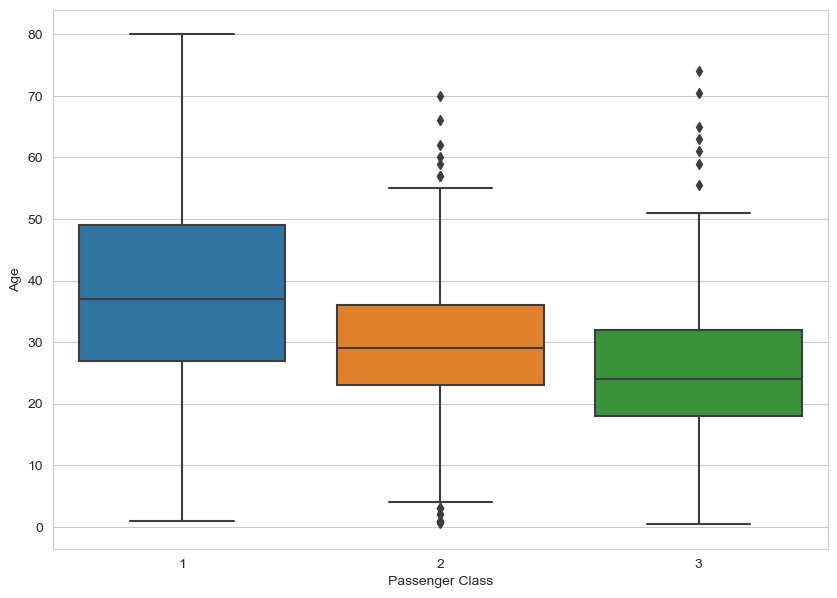

In [54]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)
plt.xlabel('Passenger Class')
plt.show()

Now we create a function to work on the inputation of the age values based on the already existing age values

A function that completes the age value with the info given by the boxplot, if the Pclass is 2 the age might be 29 ...

In [61]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37 
        elif Pclass == 2:
            return 29
        else:
            return 24
       
    else: 
        return Age

In [63]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

With that we filled in the values

<AxesSubplot:>

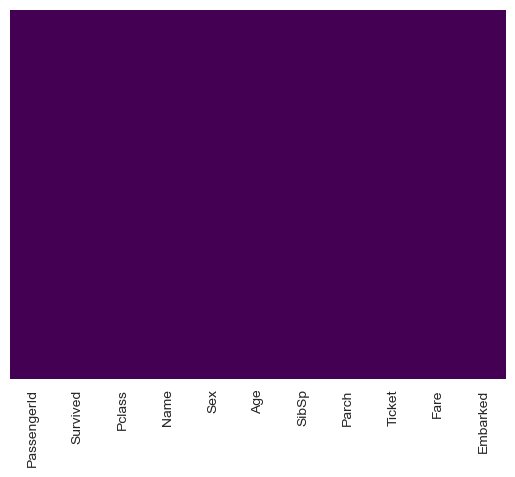

In [72]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

NOW WE DONT HAVE NULL ROWS FOR AGE

The cabin info is not that important -> drop('Cabin', axis=1, inplace=True)

In [70]:
train.drop('Cabin', axis=1, inplace=True)

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [73]:
train.dropna(inplace=True)

1st step of cleaning data -> dealing with missing values, fill and drop values


2nd step of cleaning data -> deal with categorical features, 'male' 'female' -> 0 1 -> dummy variable

What happens here is that in order to dont mess up the algorithm, if female is 0, then it can perfectly predicts that male is 1
so considering that we can just use one column
    
     

In [76]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [77]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [78]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [79]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


concatenating the other columns

In [80]:
train = pd.concat([train, sex, embark], axis=1)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


drop the columns you are not going to use


In [82]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True, axis=1)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [85]:
train.drop('PassengerId', axis=1, inplace=True)

In [86]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
